In [1]:
# !pip install xgboost

In [2]:
import xgboost as xgb

xgb.__version__

'2.0.3'

In [3]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
df['target']= y_label
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
from sklearn.model_selection import train_test_split

X_features = df.iloc[:, :-1]
y_label = df.iloc[:, -1]

train_X, test_X, train_y, test_y = train_test_split(X_features, y_label, test_size=0.2, random_state=42)
tr_X, eval_X, tr_y, eval_y = train_test_split(train_X, train_y, test_size=0.1, random_state=42)

train_X.shape, test_X.shape, tr_X.shape, eval_X.shape

((455, 30), (114, 30), (409, 30), (46, 30))

In [6]:
d_tr = xgb.DMatrix(data=tr_X, label=tr_y)
d_eval = xgb.DMatrix(data=eval_X, label=eval_y)
d_test = xgb.DMatrix(data=test_X, label=test_y)

params = {
    'max_depth' : 3,
    'eta' : 0.05,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss'
    }
num_rounds = 400

eval_list = [(d_tr,'train'), (d_eval,'eval')]

In [7]:
import numpy as np

model = xgb.train(params=params, dtrain=d_tr, num_boost_round=num_rounds,
                  early_stopping_rounds=50, evals=eval_list)

predict_prob = model.predict(d_test)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(predict_prob[:10],3))

[0]	train-logloss:0.62061	eval-logloss:0.61040
[1]	train-logloss:0.58359	eval-logloss:0.57564
[2]	train-logloss:0.55009	eval-logloss:0.54327
[3]	train-logloss:0.51925	eval-logloss:0.51391
[4]	train-logloss:0.49088	eval-logloss:0.48514
[5]	train-logloss:0.46459	eval-logloss:0.45974
[6]	train-logloss:0.44095	eval-logloss:0.43778
[7]	train-logloss:0.41868	eval-logloss:0.41535
[8]	train-logloss:0.39788	eval-logloss:0.39538
[9]	train-logloss:0.37902	eval-logloss:0.37811
[10]	train-logloss:0.36101	eval-logloss:0.36150
[11]	train-logloss:0.34428	eval-logloss:0.34771
[12]	train-logloss:0.32859	eval-logloss:0.33181
[13]	train-logloss:0.31346	eval-logloss:0.31602
[14]	train-logloss:0.29970	eval-logloss:0.30430
[15]	train-logloss:0.28682	eval-logloss:0.29124
[16]	train-logloss:0.27429	eval-logloss:0.27807
[17]	train-logloss:0.26285	eval-logloss:0.26855
[18]	train-logloss:0.25216	eval-logloss:0.25775
[19]	train-logloss:0.24180	eval-logloss:0.24890
[20]	train-logloss:0.23236	eval-logloss:0.23987
[2

In [8]:
predict = [ 1 if x > 0.5 else 0 for x in predict_prob ]
print('예측값 10개만 표시:',predict[:10])

예측값 10개만 표시: [1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
get_clf_eval(test_y, predict, predict_prob)

오차 행렬
[[40  3]
 [ 2 69]]
정확도: 0.9561, 정밀도: 0.9583, 재현율: 0.9718, F1: 0.9650, AUC:0.9915


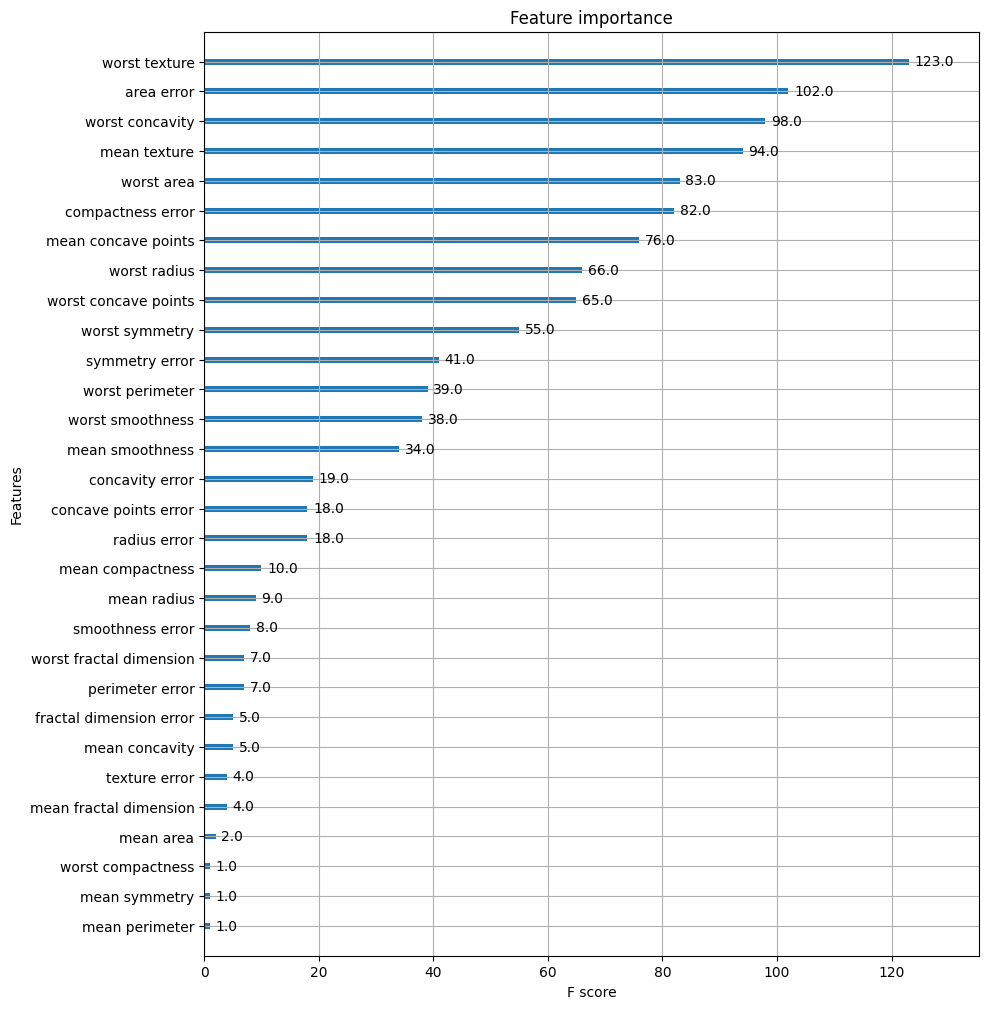

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

In [12]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
model.fit(train_X, train_y)

predict = model.predict(test_X)
predict_proba = model.predict_proba(test_X)[:, 1]

get_clf_eval(test_y, predict, predict_proba)

오차 행렬
[[40  3]
 [ 2 69]]
정확도: 0.9561, 정밀도: 0.9583, 재현율: 0.9718, F1: 0.9650, AUC:0.9938


In [13]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(test_X, test_y)]
model.fit(train_X, train_y, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

predict = model.predict(test_X)
predict_proba = model.predict_proba(test_X)[:, 1]

get_clf_eval(test_y, predict, predict_proba)

[0]	validation_0-logloss:0.58740
[1]	validation_0-logloss:0.52275
[2]	validation_0-logloss:0.47235
[3]	validation_0-logloss:0.42765
[4]	validation_0-logloss:0.38913
[5]	validation_0-logloss:0.35715
[6]	validation_0-logloss:0.33209
[7]	validation_0-logloss:0.30697
[8]	validation_0-logloss:0.28488
[9]	validation_0-logloss:0.26528
[10]	validation_0-logloss:0.24982
[11]	validation_0-logloss:0.23678
[12]	validation_0-logloss:0.22303
[13]	validation_0-logloss:0.21039
[14]	validation_0-logloss:0.20074
[15]	validation_0-logloss:0.19130
[16]	validation_0-logloss:0.17893
[17]	validation_0-logloss:0.17262
[18]	validation_0-logloss:0.16728
[19]	validation_0-logloss:0.15980
[20]	validation_0-logloss:0.15591
[21]	validation_0-logloss:0.15278
[22]	validation_0-logloss:0.14559
[23]	validation_0-logloss:0.14165
[24]	validation_0-logloss:0.13924
[25]	validation_0-logloss:0.13493
[26]	validation_0-logloss:0.13142
[27]	validation_0-logloss:0.13052
[28]	validation_0-logloss:0.12751
[29]	validation_0-loglos

In [14]:
model.fit(train_X, train_y, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

predict = model.predict(test_X)
predict_proba = model.predict_proba(test_X)[:, 1]

get_clf_eval(test_y, predict, predict_proba)

[0]	validation_0-logloss:0.58740
[1]	validation_0-logloss:0.52275
[2]	validation_0-logloss:0.47235
[3]	validation_0-logloss:0.42765
[4]	validation_0-logloss:0.38913
[5]	validation_0-logloss:0.35715
[6]	validation_0-logloss:0.33209
[7]	validation_0-logloss:0.30697
[8]	validation_0-logloss:0.28488
[9]	validation_0-logloss:0.26528
[10]	validation_0-logloss:0.24982
[11]	validation_0-logloss:0.23678
[12]	validation_0-logloss:0.22303
[13]	validation_0-logloss:0.21039
[14]	validation_0-logloss:0.20074
[15]	validation_0-logloss:0.19130
[16]	validation_0-logloss:0.17893
[17]	validation_0-logloss:0.17262
[18]	validation_0-logloss:0.16728
[19]	validation_0-logloss:0.15980
[20]	validation_0-logloss:0.15591
[21]	validation_0-logloss:0.15278
[22]	validation_0-logloss:0.14559
[23]	validation_0-logloss:0.14165
[24]	validation_0-logloss:0.13924
[25]	validation_0-logloss:0.13493
[26]	validation_0-logloss:0.13142
[27]	validation_0-logloss:0.13052
[28]	validation_0-logloss:0.12751
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

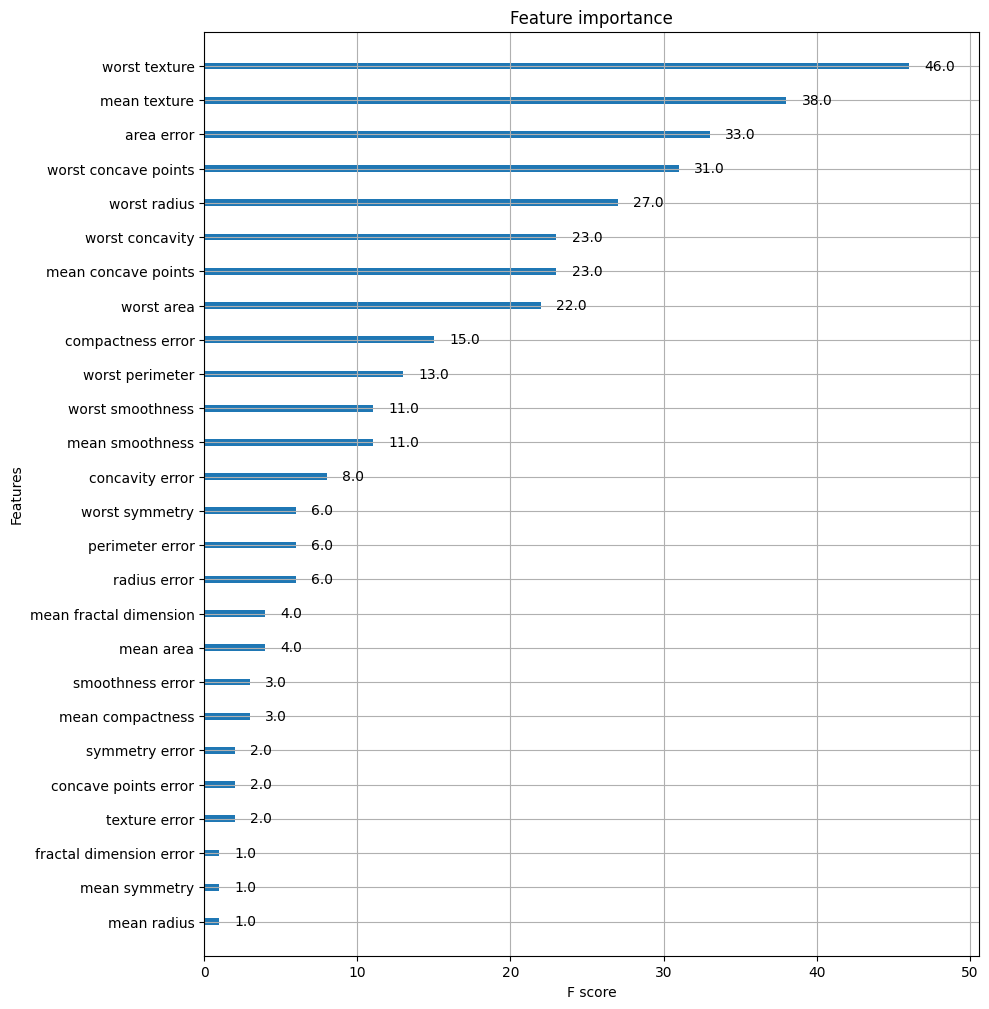

In [15]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)